# Problem 2: CVD Risk Probability
## Gaussian Naive Bayes Model
*GNB is based of this formula*
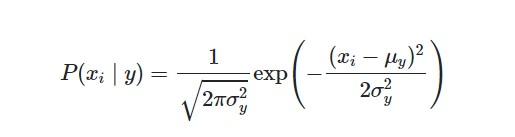
*Why use Gaussian Naive Bayes Model? Our dataset predictor values are not dependent on one another. It is relatively easy to build and can work for any size of dataset. The Model produces resonaly high accuracy too*

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
modelD = {}
# Extract response and predictor variables
y = cardioData['cardio']
X = cardioData[['age(years)', 'BMI', 'MAP']]

# Convert 'yes' and 'no' to 1 and 0
y = y.replace({'no': 0, 'yes': 1})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train a Gaussian Naive Bayes model on the training set
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Use the trained model to predict the CVD risk category for the testing set
predictions = gnb.predict(X_test)

# Convert 1 and 0 back to 'yes' and 'no'
y_test = y_test.replace({0: 'no', 1: 'yes'})
predictions = ['yes' if i == 1 else 'no' for i in predictions]

# Calculate the accuracy, confusion matrix, and precision score of the model
accuracy = accuracy_score(y_test, predictions)
confusion = confusion_matrix(y_test, predictions)
precision = precision_score(y_test, predictions, pos_label='yes')

modelD ['GNB_model']=accuracy

print("Accuracy:\t\t", accuracy)
print("Confusion Matrix:")
print(confusion)
print("Precision Score:\t", precision)


Accuracy:		 0.7033002869814766
Confusion Matrix:
[[6124 1603]
 [2946 4659]]
Precision Score:	 0.7440114979239859


## Random Forest Classifier
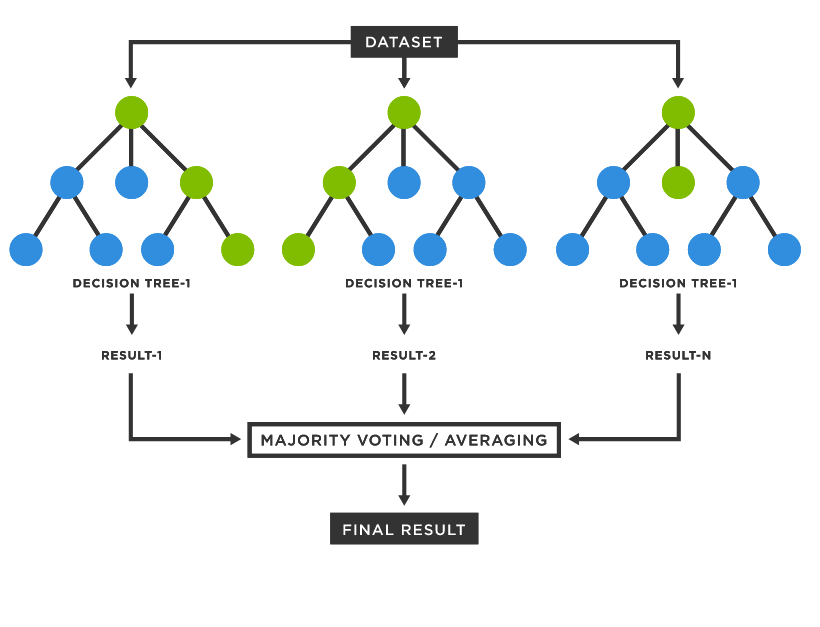
*Can be used for both regression and classification problems*

In [34]:
from sklearn.ensemble import RandomForestClassifier

# Extract response and predictor variables
y = cardioData['cardio']
X = cardioData[['age(years)', 'BMI', 'MAP']]

# Convert 'yes' and 'no' to 1 and 0
y = y.replace({'no': 0, 'yes': 1})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

classifier = RandomForestClassifier(random_state=42)
predictor = classifier.fit(X_train, y_train)
y_pred = predictor.predict(X_test)
accuracy_rfc = accuracy_score(y_test, y_pred)
modelD['random_forest_classifier'] = accuracy_rfc
print(accuracy_rfc)

0.637946777980694


## K-Neighbors Classifier(KNN)
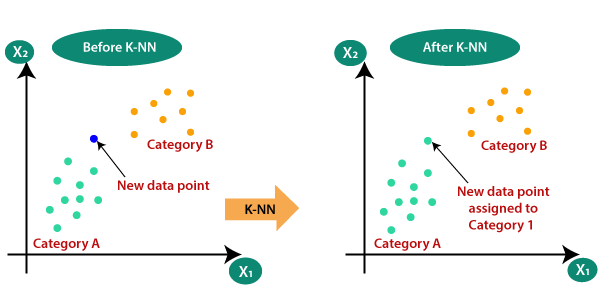
*The k-Nearest Neighbors (k-NN) algorithm is a type of supervised learning algorithm that can be used for both classification and regression problems. In classification, the k-NN algorithm works by finding the k number of training examples (i.e., the "nearest neighbors") that are closest to the input point in the feature space, based on some distance metric (such as Euclidean distance or Manhattan distance). It then assigns the class label of the input point to the most common class label among its k nearest neighbors.*

In [35]:
# Kneighbors
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
predictor = classifier.fit(X_train, y_train)
y_pred = predictor.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred)
modelD['kneighbors_classifier'] = accuracy_knn
print(accuracy_knn)

0.6634489955648317


## Support Vector Classifier
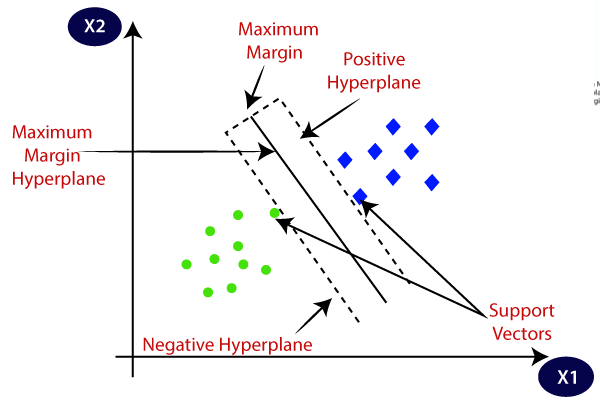
*Support Vector Classifier (SVC) is a machine learning algorithm used for classification tasks. It works by finding a hyperplane that best separates the different classes in the feature space. The hyperplane is chosen such that it maximizes the margin, which is the distance between the hyperplane and the closest data points from each class.*

In [36]:
from  sklearn.svm import SVC
#Support Vector Classifier
classifier = SVC(random_state=42)
predictor_svc = classifier.fit(X_train, y_train)
y_pred = predictor_svc.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred)
modelD['SVC'] = accuracy_svc
print(accuracy_svc)
%timeit

0.7093660318288547


## XGBoost Classifier
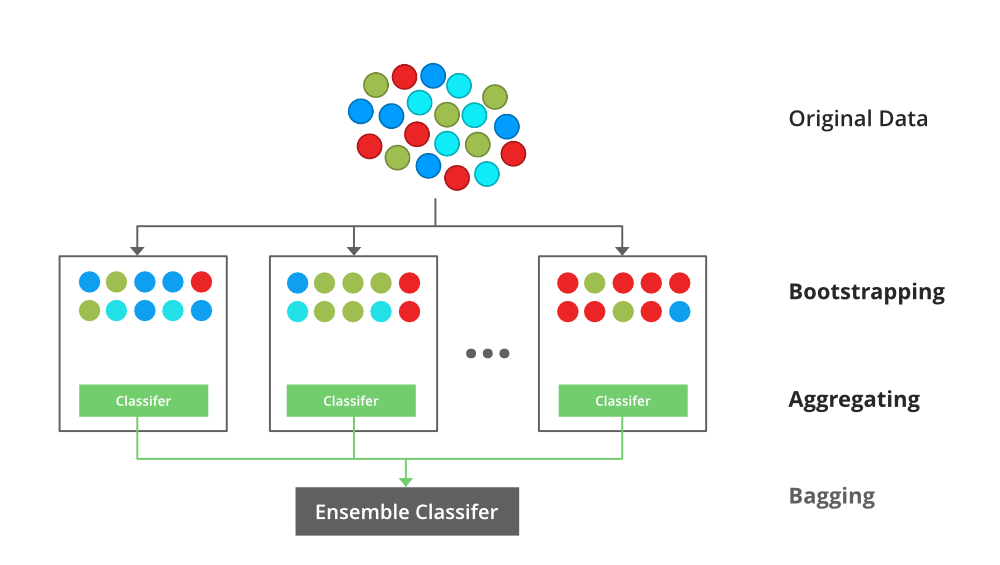
*It is an implementation of gradient-boosting decision trees. It takes each predictor variable sequentially and modelling it based on its predecessor's error. This gives more weight to predictors that perform better thus reaching an ideal model with original data*

In [37]:
from xgboost import XGBClassifier
#XGB Classifier
params = {"objective": "reg:squarederror", "tree_method": "gpu_hist"}
# Extract response and predictor variables
y = cardioData['cardio']
X = cardioData[['age(years)', 'BMI', 'MAP']]

# Convert 'yes' and 'no' to 1 and 0
y = y.replace({'no': 0, 'yes': 1})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
XGB_Classifier = XGBClassifier(**params)
XGB_Classifier.fit(X_train, y_train)
acc_XGB_Classifier = (XGB_Classifier.score(X_train, y_train))
acc_test_XGB_Classifier = (XGB_Classifier.score(X_test, y_test))
modelD['XGB'] =  acc_test_XGB_Classifier
print(acc_test_XGB_Classifier)

0.7047351943647273


In [38]:
#Show Accuracy Levels of Each Model
modelD

{'GNB_model': 0.7033002869814766,
 'random_forest_classifier': 0.637946777980694,
 'kneighbors_classifier': 0.6634489955648317,
 'SVC': 0.7093660318288547,
 'XGB': 0.7047351943647273}

**Based on the accuracy levels and computational time of the models, we strongly reccomend either using either GNB Model or XGB Classifer Model as they are able to produce relatively good accuracy levels in a fast compitation time. Support Vector is able to produce a marginally higher accuracy level but the computational time takes too long thus we ruled it as not as efficient in determining CVD risk probability**

| Model | Accuracy Value |
| --- | --- |
| GNB_Model | 0.7033002869814766 |
| Random_Forest_Classifier | 0.637946777980694 |
| K-Neighbors_Classifier | 0.6634489955648317 |
| SVC_Model | 0.7093660318288547 |
| XGBoost_Classifier | 0.7047351943647273 |

|  | age(years) | BMI | MAP | cardio | pred | 
| --- | --- | --- | --- | --- | --- |
| 0 | 50 | 21.967120 | 90.000000 | no | no | 
| 1 | 55 | 34.927679 | 106.666667 | yes | yes |
| 2 | 52 | 23.507805 | 90.000000 | yes | yes |
| 3 | 48 | 28.710479 | 116.666667 | yes | yes |
| 5 | 60 | 29.384679 | 93.333333 | no | yes |